In [1]:
from pathlib import Path

name = "librispeech-dev-clean"
in_dir = Path("data/dev-clean")
align_dir = Path("data/alignments/dev-clean")
feat_dir = Path("features")
audio_ext = ".flac" 

In [2]:
from encode import sample_files, count_number_of_utterances_for_features
from utils.features import DataSet

dataset = DataSet(
    name, in_dir, align_dir, feat_dir, audio_ext 
)

sample_size = 2000
gamma = 0.2

out_dir_dusted = Path(f"output/dusted/{sample_size}")
if sample_size < 0:
    out_dir_dusted = Path("output/dusted/all")

sampled_paths = sample_files(dataset, sample_size, True)
sample_size = len(sampled_paths)
print(sample_size)
print(count_number_of_utterances_for_features(sampled_paths))

2000
1315


In [ ]:
import numpy as np
from utils.extract import get_batch_of_paths
from joblib import Parallel, delayed
from distance import process_chunk
from tqdm import tqdm

dist_mat = np.ndarray((sample_size, sample_size), dtype=np.float64)

words = []
for chunk in tqdm(get_batch_of_paths(len(sampled_paths), 6), desc="Processing Chunks"):
    
    results = Parallel(n_jobs=6)([delayed(process_chunk)(sub_chunk, sampled_paths, dataset, gamma, dist_mat) for sub_chunk in chunk])
    
    for chunk_result in results:
        dist_mat += chunk_result[0]
        words.extend(chunk_result[1])
    
dist_mat += dist_mat.T

Load Chunk:   2%|▏         | 383/16667 [00:14<09:17, 29.19it/s]10, 2427.11it/s]

In [ ]:
from encode import get_units
from joblib import Parallel, delayed

results = Parallel(n_jobs=2)([
    delayed(get_units)(dataset, "dusted", sampled_paths, gamma, True),  
])
dusted_words = results[0]


Using cache found in /home/danel/.cache/torch/hub/bshall_dusted_main
Using cache found in /home/danel/.cache/torch/hub/bshall_dusted_main
Using cache found in /home/danel/.cache/torch/hub/bshall_hubert_main
Getting units:   0%|          | 0/10 [00:00<?, ?it/s]


RuntimeError: Failed to open the input "features/dusted_units/0.2/3081/166546/3081-166546-0077_22.npy" (Invalid data found when processing input).
Exception raised from get_input_format_context at /__w/audio/audio/pytorch/audio/src/libtorio/ffmpeg/stream_reader/stream_reader.cpp:42 (most recent call first):
frame #0: c10::Error::Error(c10::SourceLocation, std::string) + 0x96 (0x71600341a1b6 in /home/danel/Documents/acoustic-units/.env/lib/python3.12/site-packages/torch/lib/libc10.so)
frame #1: c10::detail::torchCheckFail(char const*, char const*, unsigned int, std::string const&) + 0x64 (0x7160033c3a76 in /home/danel/Documents/acoustic-units/.env/lib/python3.12/site-packages/torch/lib/libc10.so)
frame #2: <unknown function> + 0x42034 (0x71600313b034 in /home/danel/Documents/acoustic-units/.env/lib/python3.12/site-packages/torio/lib/libtorio_ffmpeg6.so)
frame #3: torio::io::StreamingMediaDecoder::StreamingMediaDecoder(std::string const&, std::optional<std::string> const&, std::optional<std::map<std::string, std::string, std::less<std::string>, std::allocator<std::pair<std::string const, std::string> > > > const&) + 0x14 (0x71600313da34 in /home/danel/Documents/acoustic-units/.env/lib/python3.12/site-packages/torio/lib/libtorio_ffmpeg6.so)
frame #4: <unknown function> + 0x3b78e (0x715f341ea78e in /home/danel/Documents/acoustic-units/.env/lib/python3.12/site-packages/torio/lib/_torio_ffmpeg6.so)
frame #5: <unknown function> + 0x32ba4 (0x715f341e1ba4 in /home/danel/Documents/acoustic-units/.env/lib/python3.12/site-packages/torio/lib/_torio_ffmpeg6.so)
frame #6: /home/danel/Documents/acoustic-units/.env/bin/python() [0x58238f]
frame #7: _PyObject_MakeTpCall + 0x75 (0x549225 in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #8: /home/danel/Documents/acoustic-units/.env/bin/python() [0x54cf57]
frame #9: /home/danel/Documents/acoustic-units/.env/bin/python() [0x59e6e1]
frame #10: /home/danel/Documents/acoustic-units/.env/bin/python() [0x599f93]
frame #11: <unknown function> + 0xfc1b (0x716003180c1b in /home/danel/Documents/acoustic-units/.env/lib/python3.12/site-packages/torchaudio/lib/_torchaudio.so)
frame #12: _PyObject_MakeTpCall + 0x75 (0x549225 in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #13: _PyEval_EvalFrameDefault + 0xa89 (0x5d7909 in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #14: _PyObject_Call_Prepend + 0xc2 (0x54aa72 in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #15: /home/danel/Documents/acoustic-units/.env/bin/python() [0x59e54f]
frame #16: /home/danel/Documents/acoustic-units/.env/bin/python() [0x599f93]
frame #17: _PyObject_MakeTpCall + 0x75 (0x549225 in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #18: _PyEval_EvalFrameDefault + 0xa89 (0x5d7909 in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #19: _PyObject_Call_Prepend + 0xc2 (0x54aa72 in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #20: /home/danel/Documents/acoustic-units/.env/bin/python() [0x5a3b08]
frame #21: PyObject_Call + 0x6c (0x54b3ac in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #22: _PyEval_EvalFrameDefault + 0x4b83 (0x5dba03 in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #23: _PyObject_Call_Prepend + 0xc2 (0x54aa72 in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #24: /home/danel/Documents/acoustic-units/.env/bin/python() [0x5a3b08]
frame #25: _PyObject_MakeTpCall + 0x75 (0x549225 in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #26: _PyEval_EvalFrameDefault + 0xa89 (0x5d7909 in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #27: PyEval_EvalCode + 0x15b (0x5d5e4b in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #28: /home/danel/Documents/acoustic-units/.env/bin/python() [0x5d39dc]
frame #29: /home/danel/Documents/acoustic-units/.env/bin/python() [0x58220d]
frame #30: PyObject_Vectorcall + 0x35 (0x549c25 in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #31: _PyEval_EvalFrameDefault + 0xa89 (0x5d7909 in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #32: /home/danel/Documents/acoustic-units/.env/bin/python() [0x6bd432]
frame #33: Py_RunMain + 0x232 (0x6bd062 in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #34: Py_BytesMain + 0x2d (0x6bcccd in /home/danel/Documents/acoustic-units/.env/bin/python)
frame #35: <unknown function> + 0x2a1ca (0x71601282a1ca in /lib/x86_64-linux-gnu/libc.so.6)
frame #36: __libc_start_main + 0x8b (0x71601282a28b in /lib/x86_64-linux-gnu/libc.so.6)
frame #37: _start + 0x25 (0x658425 in /home/danel/Documents/acoustic-units/.env/bin/python)


In [ ]:
from utils.features import load_units_from_paths
from joblib import Parallel, delayed

results = Parallel(n_jobs=2)([
    delayed(load_units_from_paths)(dataset, "dusted", sampled_paths, gamma=0.2),  
])

dusted_words = results[0]

Loading Units: 100%|██████████| 2703/2703 [06:28<00:00,  6.96it/s]


In [ ]:
from distance import calculate_distance

# If calculate_distance is called with only the words, it does not save the matrices
dist_mat_dusted = calculate_distance(dusted_words, out_dir_dusted, 1)

In [ ]:
from utils.features import get_words_and_dist_mat

dusted_words, dist_mat_dusted = get_words_and_dist_mat(dataset, "dusted", out_dir_dusted, sample_size, gamma)

FileNotFoundError: [Errno 2] No such file or directory: 'output/dusted/50/words.csv'

In [ ]:
from utils.features import display_words

true_words = display_words(dusted_words)

Sorted Word Counts


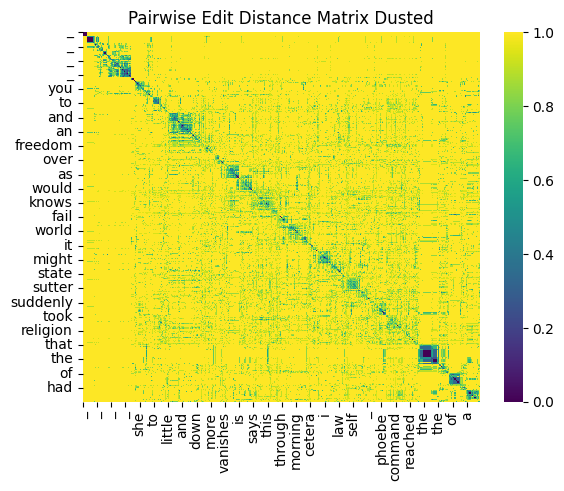

In [ ]:
from eval import pairwise_edit_dist_mat

# Visualise the distances
pairwise_edit_dist_mat(dist_mat_dusted, "Pairwise Edit Distance Matrix Dusted", true_words)

In [ ]:
from cluster import cluster, get_word_clusters

# Get the int_clusters for each of the matrices
dust_clusters = cluster(dist_mat_dusted, 0.2)

# Convert these to word clusters
dust_word_clusters = get_word_clusters(dust_clusters, dusted_words)

Getting Word Clusters: 100%|██████████| 4909/4909 [00:02<00:00, 2343.80it/s]


In [ ]:
from cluster import get_loaded_clusters

dust_word_clusters = get_loaded_clusters(dusted_words)

In [ ]:
from eval import ned

# Compute the ned for my dusted and hubert clusters - atm my NED is computed only using clusters with > 1 words
ned_dusted = ned(dust_word_clusters, print_pure=False, print_inpure=True)
print(f"DUSTED NED: {ned_dusted}")

Calculating NED: 100%|██████████| 4909/4909 [00:00<00:00, 292527.47it/s]

Cluster 9: 0.047244094488188976
the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, a, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the

Cluster 14: 0.8
then, then, then, men, then

Cluster 22: 1
and, and, in, an, and

Cluster 39: 0.45789473684210524
in, in, in, in, in, in, in, in, in, and, in, in, and, in, in, an, in, in, in, in

Cluster 42: 0.09781420765027322
the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, th

In [ ]:
from cluster import get_best_clusters

ned_dusted, duplicate_count_dusted, dust_word_clusters = get_best_clusters(dust_word_clusters, ned_dusted, max_iter=5)

Iteration 0: NED: 0.061213, Duplicates: 3183


Calculating NED: 100%|██████████| 4909/4909 [00:00<00:00, 532505.00it/s]


Iteration 1: NED: 0.061804


Calculating NED: 100%|██████████| 4909/4909 [00:00<00:00, 531858.51it/s]


Iteration 2: NED: 0.060975


Calculating NED: 100%|██████████| 4909/4909 [00:00<00:00, 536626.92it/s]


Iteration 3: NED: 0.061163


Calculating NED: 100%|██████████| 4909/4909 [00:00<00:00, 522253.35it/s]


Iteration 4: NED: 0.060921


Calculating NED: 100%|██████████| 4909/4909 [00:00<00:00, 535287.62it/s]

Iteration 5: NED: 0.060741
Best NED: 0.060741, Best Duplicates: 3168


In [ ]:
from utils.features import store_words

# Store words associated with these clusters
store_words(dust_word_clusters, out_dir_dusted)

Wrote words to output/dusted/300/words.csv


In [ ]:
from eval import words_from_word_units, clusters_purity
            
dust_just_words_clusters = words_from_word_units(dust_word_clusters)
inpurity, total = clusters_purity(dust_just_words_clusters)
print(f"{total} Dusted Clusters with inpurity: {round(inpurity*100, 3)}%")

4909 Dusted Clusters with inpurity: 59.747%


In [ ]:
from eval import calculate_duplicate_clusters

cluster_counts_dusted, duplicate_counts_dusted = calculate_duplicate_clusters(dust_word_clusters, print_clusters=True)

Total duplicate clusters (considering word frequency): 3168
Duplicate clusters and their counts:
{'three': 1}: 4 times
{'into': 1}: 8 times
{'_': 9}: 5 times
{'of': 3}: 5 times
{'_': 1}: 213 times
{'delightful': 1}: 2 times
{'song': 1}: 2 times
{'of': 5}: 3 times
{'bird': 1}: 2 times
{'that': 1}: 50 times
{'have': 1}: 19 times
{'the': 4}: 2 times
{'and': 1}: 113 times
{'and': 2}: 13 times
{'turn': 1}: 2 times
{'other': 1}: 9 times
{'is': 1, 'his': 1}: 2 times
{'do': 1}: 9 times
{'side': 1}: 6 times
{'it': 1}: 43 times
{'near': 1}: 5 times
{'fire': 1}: 3 times
{'it': 2}: 3 times
{'place': 1}: 3 times
{'then': 1}: 9 times
{'until': 1}: 2 times
{'that': 2}: 5 times
{'so': 1}: 5 times
{'not': 1}: 9 times
{'and': 4}: 3 times
{'feature': 1}: 2 times
{'worth': 1}: 3 times
{'serve': 1}: 2 times
{'much': 1}: 4 times
{'how': 1}: 6 times
{'_': 2}: 55 times
{'the': 5}: 2 times
{'on': 1}: 14 times
{'in': 2, 'and': 1}: 2 times
{'is': 1}: 19 times
{'little': 1}: 5 times
{'but': 1}: 43 times
{'they': 

In [ ]:
def save_cluster_centroids(centroids, dir):
    out_path = Path(dir) / "centroids.csv"
    centroid_df = pd.DataFrame(columns=["id", "text", "units"])
    for c in range(len(centroids)):
        
        new_row = pd.DataFrame(
            [[c, centroids[c].true_word, centroids[c].clean_encoding]],
            columns=centroid_df.columns,
        )
        centroid_df = pd.concat([centroid_df, new_row], ignore_index=True)
    centroid_df.to_csv(out_path, index=False)
    print(f"Wrote centroids to {out_path}")


In [ ]:
from cluster import get_cluster_centroids

centroids = get_cluster_centroids(dust_word_clusters)
save_cluster_centroids(centroids, out_dir_dusted)

Calculating Cluster Centroids: 100%|██████████| 4909/4909 [00:00<00:00, 21730.95it/s]


Wrote centroids to output/dusted/300/centroids.csv


In [ ]:
from encode import sample_files
from utils.features import load_units_from_paths
from encode import get_units
from cluster import get_distance_to_centroids, get_cluster_centroids
import editdistance
import statistics

query_path = sample_files(dataset, sample_size=1)

# Query one of the ladys
# query_path = [Path("data/dev-clean/174/50561/174-50561-0013.flac")]

query_dusted_words = load_units_from_paths(dataset, "dusted", query_path, gamma=0.2)
if not query_dusted_words:
    query_dusted_words = get_units(dataset, "dusted", query_path, gamma=0.2, save=True)
query_dusted_sentence = " ".join([w.true_word for w in query_dusted_words])

dust_centroids = get_cluster_centroids(dust_word_clusters)
query_dusted_words = get_distance_to_centroids([query_dusted_words], dust_centroids)


predictions = []
query_distances = []
for word in query_dusted_words:
    prediction = dust_centroids[word.cluster_id].true_word
    # print(" : ".join([word.true_word, prediction]))
    query_distances.append(editdistance.eval(word.true_word, prediction)/max(len(word.true_word), len(prediction)))
    predictions.append(prediction)

prediction_sentence = " ".join(predictions)
print(f"NED for query: {statistics.mean(query_distances)}")
print(query_dusted_sentence)
print(prediction_sentence)

Get Distances to Centroids: 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

NED for query: 0.175
the any there _ _ think you one is chance other for
the any their _ _ thing you one is pin other to
